**Load dataset**

In [13]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

import sklearn.metrics as sm
from sklearn.metrics import adjusted_mutual_info_score,homogeneity_completeness_v_measure

from sklearn.decomposition import PCA,FastICA,TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis,entropy

derm = np.loadtxt("./dermatology2.csv", delimiter=",") #Required deleting the '?' values
print(derm.shape)

# store feature matrix in "X"
#X = derm[:,0:33]
X = derm[:,0:33]

# store response vector in "y"
#y = derm[:,34]
y = derm[:,34]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(358, 35)
(286, 33) (286,)
(72, 33) (72,)


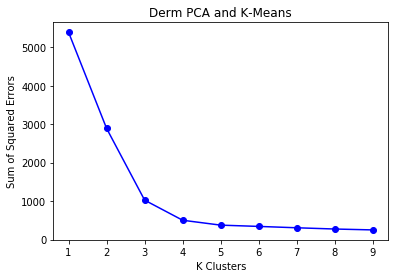

In [40]:
pca = PCA()
principalComponents = pca.fit_transform(X)# Plot the explained variances
features = range(pca.n_components_)
PCA_components = pd.DataFrame(principalComponents)

ks = range(1, 10)
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    sse.append(model.inertia_)
    
plt.plot(ks, sse, '-o', color='blue')
plt.xlabel('K Clusters')
plt.ylabel('Sum of Squared Errors')
plt.xticks(ks)
plt.title("Derm PCA and K-Means")
plt.show()

Text(0.5, 1.0, 'Derm PCA and K-Means')

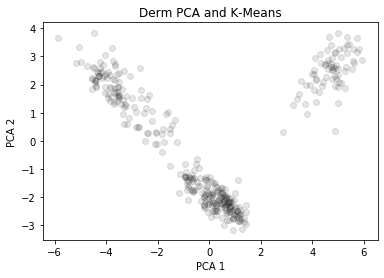

In [41]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Derm PCA and K-Means")

homogeneity  0.6775649010896551
completeness  0.5649864802435616
v_measure  0.6161757402619009


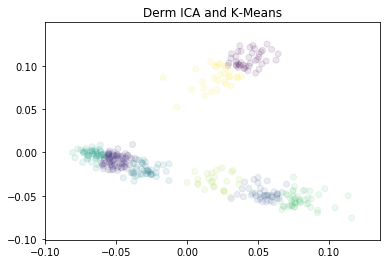

In [52]:
temp = FastICA(n_components = 2).fit_transform(X)

graph = KMeans().fit_predict(temp)

plt.scatter(temp[:, 0], temp[:, 1], c=graph,alpha = 0.1);
plt.title("Derm ICA and K-Means")

homogeneity,completeness,v_measure = homogeneity_completeness_v_measure(y,graph)

print("homogeneity ",homogeneity)
print("completeness ",completeness)
print("v_measure ",v_measure)

/home/kellgon/.local/lib/python3.6/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


homogeneity  0.27910049270755133
completeness  0.41193636676237333
v_measure  0.3327511155214746


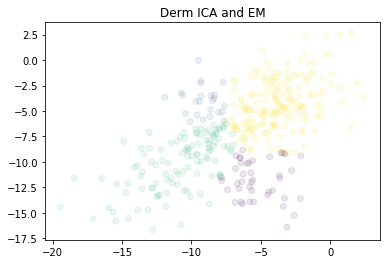

In [50]:
graph = BayesianGaussianMixture(n_components=6).fit(temp).predict(temp)

plt.scatter(temp[:, 0], temp[:, 1], c=graph,alpha = 0.1);
plt.title("Derm ICA and EM");

homogeneity,completeness,v_measure = homogeneity_completeness_v_measure(y,graph)

print("homogeneity ",homogeneity)
print("completeness ",completeness)
print("v_measure ",v_measure)

homogeneity  0.20348107691283843
completeness  0.17537627305938663
v_measure  0.18838622457608498


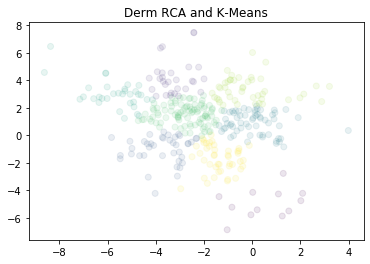

In [51]:
temp = GaussianRandomProjection(n_components = 2).fit_transform(X)

graph = KMeans().fit_predict(temp)

plt.scatter(temp[:, 0], temp[:, 1], c=graph,alpha = 0.1);
plt.title("Derm RCA and K-Means")

homogeneity,completeness,v_measure = homogeneity_completeness_v_measure(y,graph)

print("homogeneity ",homogeneity)
print("completeness ",completeness)
print("v_measure ",v_measure)